In [194]:
import sys
sys.path.append('C:\Anaconda3\Lib\site-packages')

%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

### Linear Regression
We can use the least square method to estimate the coefficients of a linear model by minimizing the sum of the squared residuals

$$S = \sum{(y_i - (mx_i + b))^2}$$

for the equation

$$ y = mx + b $$

### Load into dataframe

In [195]:
from sklearn.datasets import load_boston

In [196]:
boston = load_boston()
boston.keys()

dict_keys(['DESCR', 'feature_names', 'target', 'data'])

In [197]:
boston['data'].shape

(506, 13)

In [198]:
boston['data'][505].shape

(13,)

In [199]:
# Print a general description
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [200]:
# Column names ... it looks like MEDV is missing,
# this at least explains why there are only 13 elements.
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [201]:
bos = pd.DataFrame(boston['data'], columns=boston['feature_names'])
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [202]:
# We also have a separate key for the 'prices'
print(boston['target'][:10])

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9]


In [203]:
bos['PRICE'] = boston['target']
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### At a glance...

In [204]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Visualize

In [205]:
# CRIM - per capita crime rate
# RM - average # of rooms per dwelling
# PTRATIO - pupil-teacher ratio

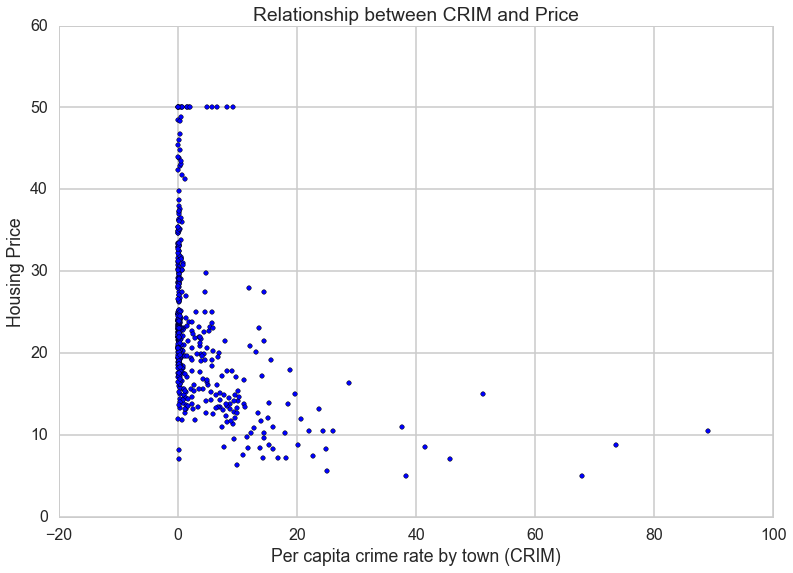

In [206]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

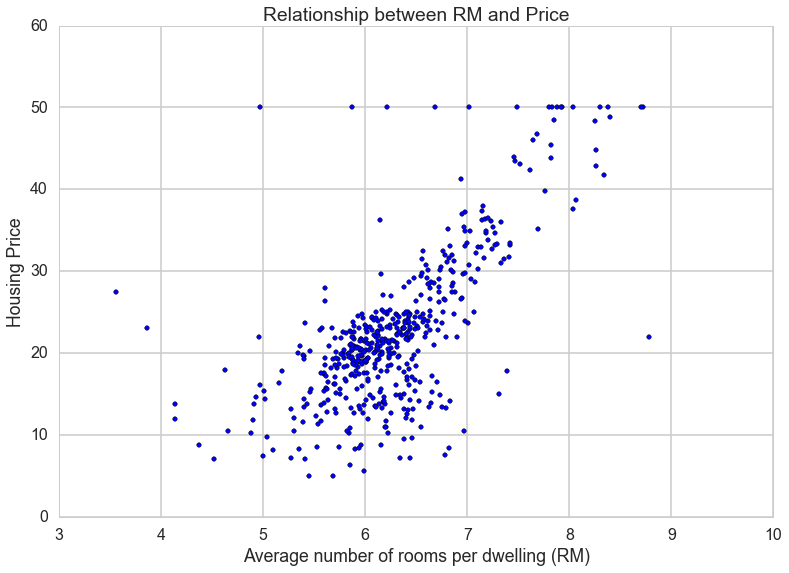

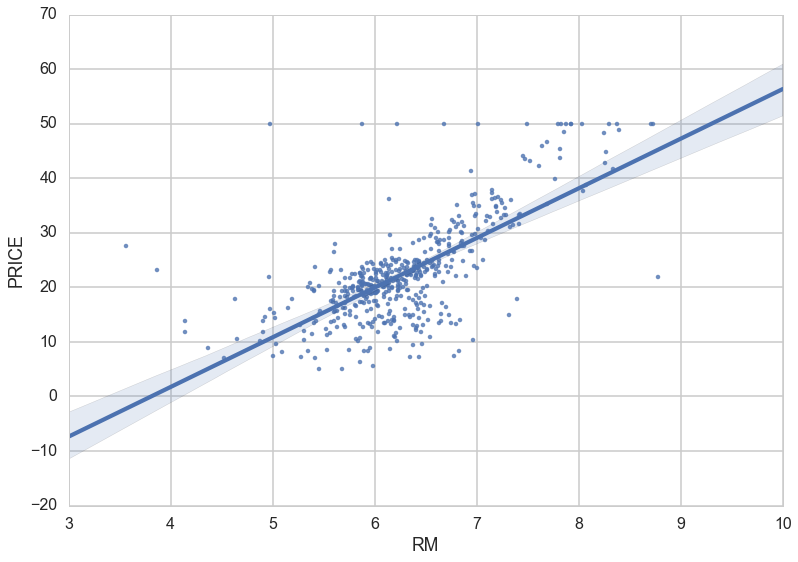

In [207]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

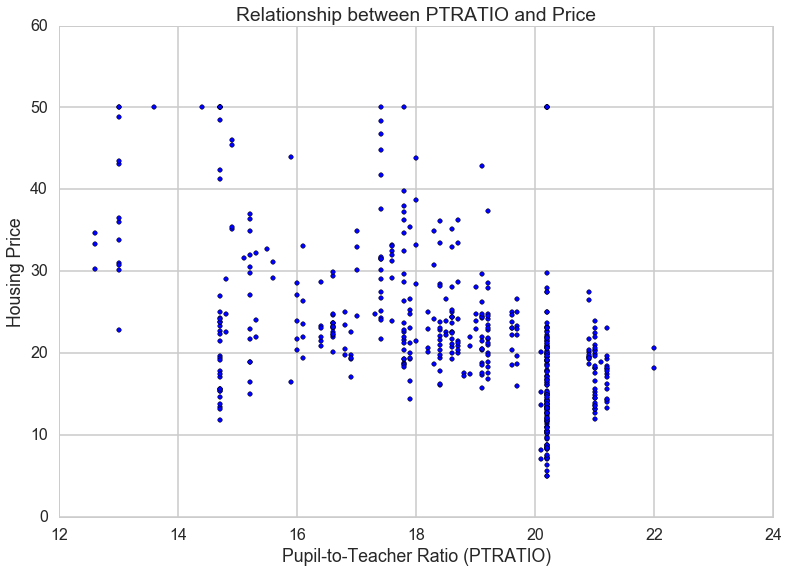

In [208]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

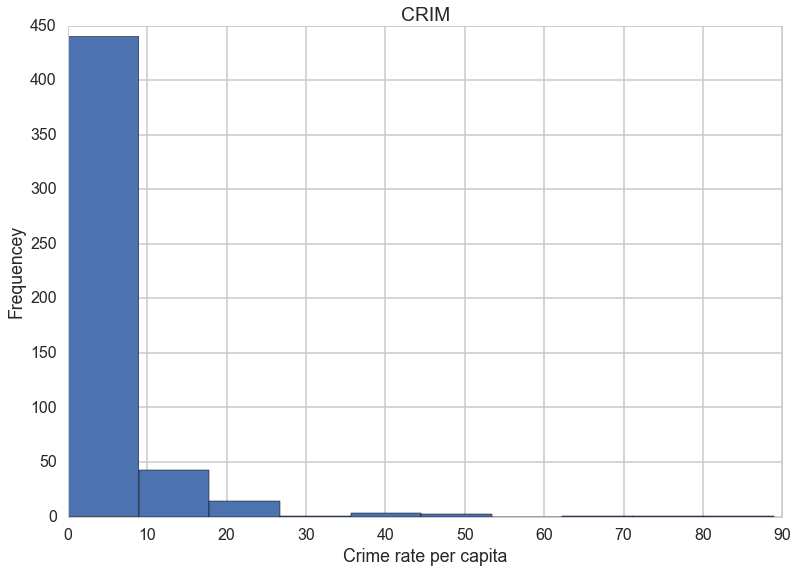

In [209]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")

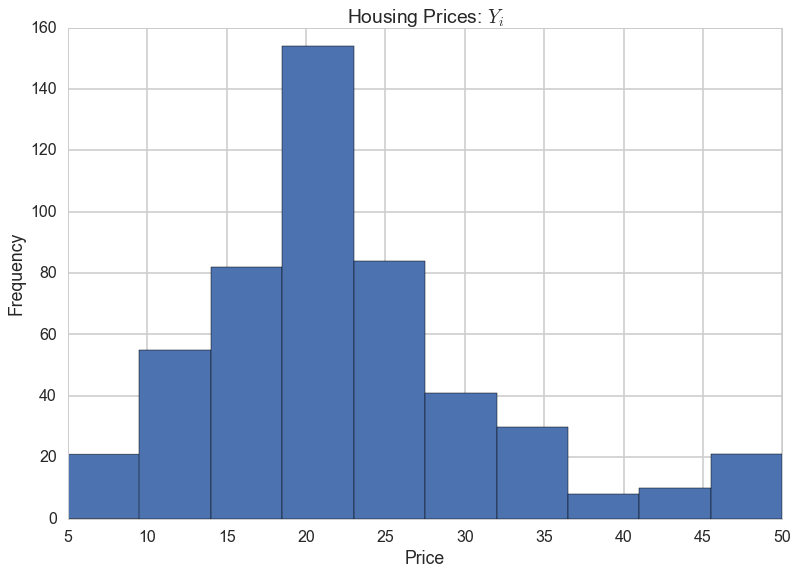

In [210]:
plt.hist(bos.PRICE)
plt.title('Housing Prices: $Y_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')

### Housing data linear regression

$y = mx + b$ where $y$ is the housing prices and $x$ can be any one of the other variables

In [211]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [212]:
reg = ols('PRICE ~ RM', bos).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 24 Apr 2016   Prob (F-statistic):           2.49e-74
Time:                        16:25:23   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000       -39.877   -29.465
RM             9.1021      0.419     21.722      0.000         8.279     9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

m~9.1 can be interpreted, in this case - due to the x-axis, as the average difference in hosue prices (ie. $9,100) between e.g. 5 and 6 bedroom homes

m= 9.10210898118 b= -34.6706207764


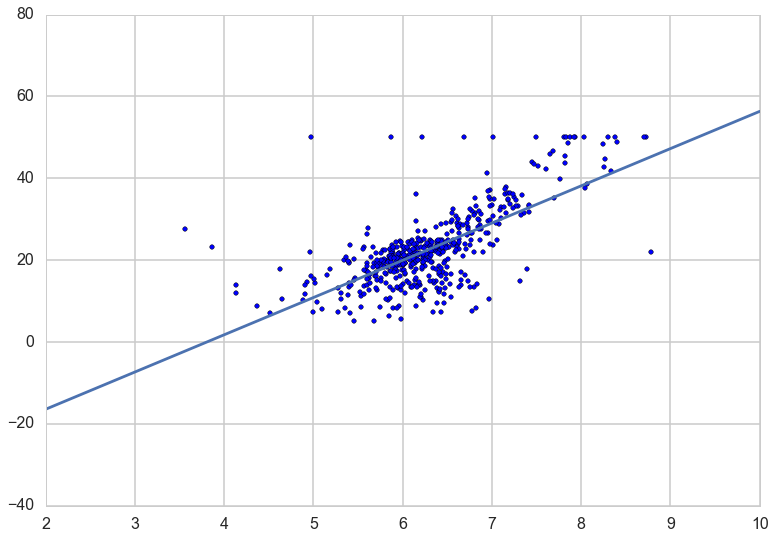

In [213]:
''' Plotting the line produced by the ols model '''
m, b = reg.params[1], reg.params[0]
print('m=',m,'b=', b)
y = lambda x, m, b: m*x + b
xx = np.linspace(0, 10, 10)
yy = [y(x, m, b) for x in xx]
plt.plot(xx, yy)
plt.xlim(2,10)

plt.scatter(bos.RM, bos.PRICE)

For statsmodels (ols or logit) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (Outcome, X1,X2, ...). The structure is very simple:

Outcome ~ X1

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

Outcome ~ X1 + X2 + X3

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
5      23.855940
6      20.051258
7      21.507596
8      16.583355
9      19.978442
10     23.373528
11     20.023952
12     18.931699
13     19.477826
14     20.815836
15     18.431083
16     19.350396
17     19.851012
18     14.990486
19     17.457157
20     16.028126
21     19.623459
22     21.234533
23     18.239939
24     19.250273
25     16.292087
26     18.239939
27     20.369832
28     24.447577
29     26.076855
         ...    
476    24.347454
477    13.606965
478    21.625923
479    22.026416
480    22.144743
481    26.768615
482    29.599371
483    17.775731
484    18.767861
485    22.781891
486    20.979674
487    19.077333
488    14.972282
489    14.608197
490    11.686420
491    19.787297
492    19.787297
493    17.275115
494    19.268477
495    16.938337
496    14.389747
497    18.066999
498    20.114973
499    16.019024
500    20.187790
501    25.339584
502    21.034286
503    28.8256

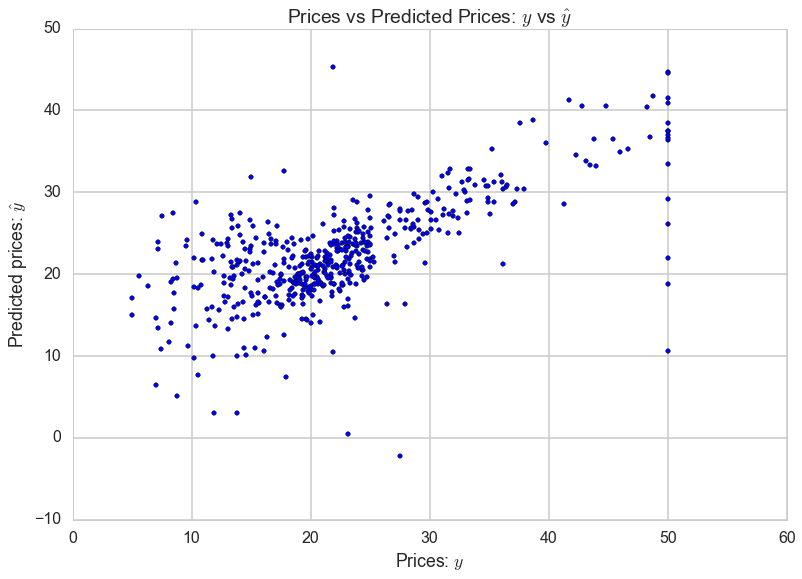

In [214]:
''' I really don't understand whats being plotted here '''
plt.scatter(bos['PRICE'], reg.fittedvalues)
plt.xlabel("Prices: $y$")
plt.ylabel("Predicted prices: $\hat{y}$")
plt.title("Prices vs Predicted Prices: $y$ vs $\hat{y}$")
reg.fittedvalues

### Using `sklearn` for fitting

In [215]:
from sklearn.linear_model import LinearRegression

In [216]:
lm = LinearRegression()
print(type(lm))
lm

<class 'sklearn.linear_model.base.LinearRegression'>


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [217]:
# What can we do with this object???
#
# lm.fit() = fit a linear model
# lm.predict() = Predict y using the linear model with estimated
#                coefficients
# lm.score() = Returns the coefficient of determination (R^2).
#              A measure of how well observed outcomes are replicated
#              by the model, as the proportion of total variation of
#              outcomes explained by the model

In [218]:
xdf = bos.drop('PRICE', axis=1)
xdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [219]:
# Feed all 13 predictors into the model
lm.fit(xdf, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [220]:
print(lm.fit_intercept) # True
# We have to change the model type if we don't want
# to fit intercepts. e.g. -->

lm_nofit_int = LinearRegression(fit_intercept=False)
lm_nofit_int.fit(xdf, bos.PRICE)
print(lm_nofit_int.fit_intercept) # False

True
False


In [221]:
print('estimated intercept (only one??):', lm.intercept_)

estimated intercept (only one??): 36.4911032804


In [222]:
print('# of slope coefficients:', len(lm.coef_))

# of slope coefficients: 13


The model is of the form

$y = b + m_1x_1 + m_2x_2 + ... + m_{13}x_{13}$

where $y$ is the house price.

In [223]:
slopes = pd.DataFrame(list(zip(xdf.columns, lm.coef_, [lm.intercept_]*len(lm.coef_))), columns=['features', 'estimated_slopes', 'intercept'])
slopes

,features,estimated_slopes,intercept
0,CRIM,-0.107171,36.491103
1,ZN,0.046395,36.491103
2,INDUS,0.020860,36.491103
3,CHAS,2.688561,36.491103
4,NOX,-17.795759,36.491103
5,RM,3.804752,36.491103
6,AGE,0.000751,36.491103
7,DIS,-1.475759,36.491103
8,RAD,0.305655,36.491103
9,TAX,-0.012329,36.491103


In [224]:
# Let's predict one value based on a set of features
#x_features = bos.loc[0]
x_features = xdf[xdf.index == 0]
x_features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98


In [225]:
print('aaaannnd the prediction is:', lm.predict(x_features))

aaaannnd the prediction is: [ 30.00821269]


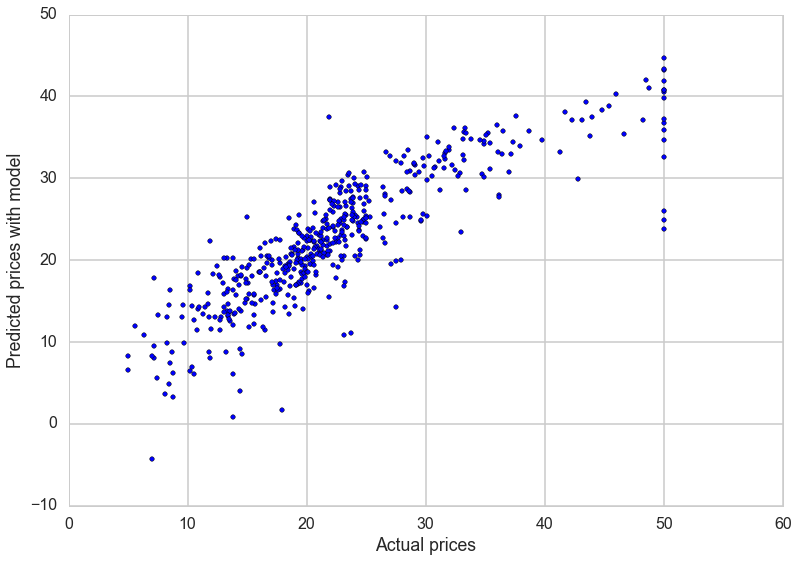

In [226]:
# Calculate predicted values for each ACTUAL house value
plt.scatter(bos.PRICE, lm.predict(xdf))
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices with model')

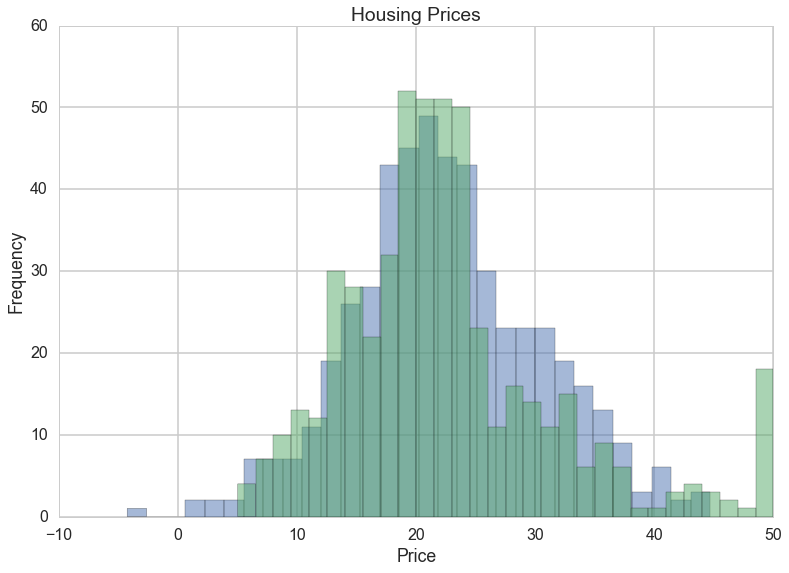

In [227]:
plt.hist(lm.predict(xdf), alpha=0.5, label='Predicted', bins=30)
plt.hist(bos.PRICE, alpha=0.5, label='Actual', bins=30)
plt.title('Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

#### Calculating the residual sum of squares:

$$ S = \sum_i{(y_i - (b + \sum_j{m_jx_i}))^2} $$

In [228]:
print((bos.PRICE - lm.predict(xdf)).shape)
residual = np.sum((bos.PRICE - lm.predict(xdf))**2)
residual

(506,)


11080.276284149866

#### Compare to the mean squared error:
$$ S = \frac{1}{N} \sum_i{(y_i - (b + \sum_j{m_jx_i}))^2} $$

In [229]:
mse = np.mean((bos.PRICE - lm.predict(xdf))**2)
mse

21.897779217687482

#### Relationship between PTRATIO and housing price

In [230]:
''' WOW this is really cool '''
print(type(xdf[['PTRATIO']]))
print(type(xdf['PTRATIO']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [231]:
lm = LinearRegression()
lm.fit(xdf[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [232]:
mse = np.mean((bos.PRICE - lm.predict(xdf[['PTRATIO']]))**2)
mse

62.65220001376923

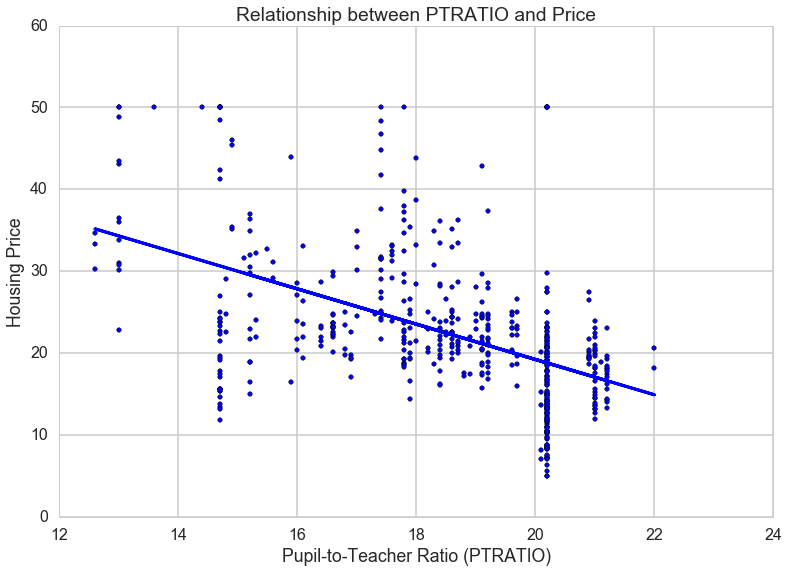

In [233]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

plt.plot(bos.PTRATIO, lm.predict(xdf[['PTRATIO']]), color='blue', linewidth=3)
plt.show()

#### Fitting a linear model to CRM, RM, PTRATIO

In [234]:
xdf = bos.loc[:,['CRIM', 'RM', 'PTRATIO']]
xdf.head()

,CRIM,RM,PTRATIO
0,0.00632,6.575,15.3
1,0.02731,6.421,17.8
2,0.02729,7.185,17.8
3,0.03237,6.998,18.7
4,0.06905,7.147,18.7


In [235]:
lm = LinearRegression()
lm.fit(xdf, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [236]:
print(lm.coef_, lm.intercept_)

[-0.20210971  7.3815667  -1.0741868 ] -3.30661713241


In [237]:
x = xdf.loc[[0]]
print(type(x))
print('')
print(x, lm.predict(x))
print('')
x = xdf.loc[[1]]
print(x, lm.predict(x))

<class 'pandas.core.frame.DataFrame'>

      CRIM     RM  PTRATIO
0  0.00632  6.575     15.3 [ 28.7908486]

      CRIM     RM  PTRATIO
1  0.02731  6.421     17.8 [ 24.96437805]


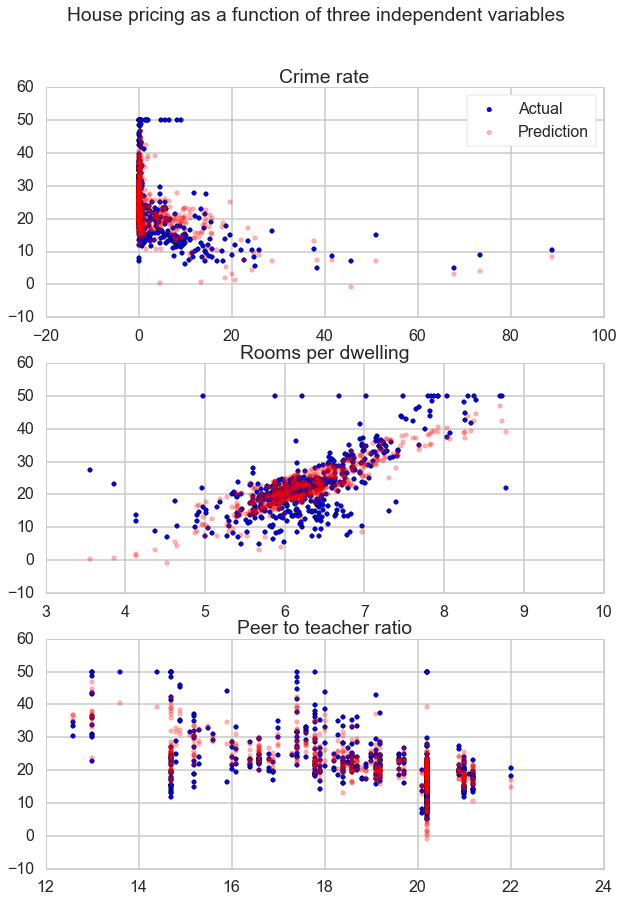

In [253]:
fig = plt.figure(figsize=(10,14))
plt.suptitle('House pricing as a function of three independent variables')
plt.subplot(311)
plt.title('Crime rate')
plt.scatter(bos.CRIM, bos.PRICE, label='Actual')
plt.scatter(bos.CRIM, lm.predict(xdf), color='red', alpha=0.3, label='Prediction')
plt.legend(frameon=True)
plt.subplot(312)
plt.title('Rooms per dwelling')
plt.scatter(bos.RM, bos.PRICE, label='Actual')
plt.scatter(bos.RM, lm.predict(xdf), color='red', alpha=0.3, label='Prediction')
plt.subplot(313)
plt.title('Peer to teacher ratio')
plt.scatter(bos.PTRATIO, bos.PRICE, label='Actual')
plt.scatter(bos.PTRATIO, lm.predict(xdf), color='red', alpha=0.3, label='Prediction')

#### Residual plot

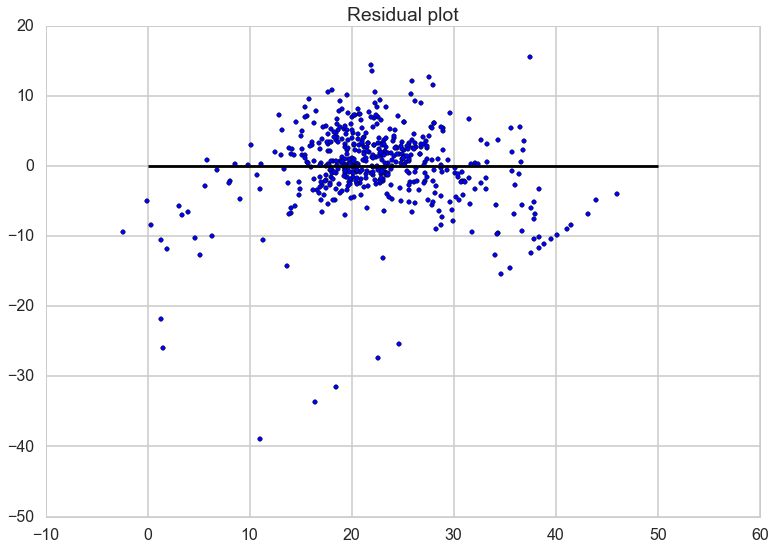

In [273]:
plt.title('Residual plot')
plt.scatter(lm.predict(xdf), lm.predict(xdf)-bos.PRICE)
plt.hlines(y = 0, xmin=0, xmax = 50)

### Training VS Test Data

In [256]:
x_train = xdf[:-50]
x_test = xdf[-50:]
y_train = bos.PRICE[:-50]
y_test = bos.PRICE[-50:]
print(x_train.shape, x_test.shape)

(456, 3) (50, 3)


This can also be done with sklearn:

In [258]:
x_train, x_test, y_train, y_test = sklearn.cross_validation.train_test_split(
                                    xdf, bos.PRICE, test_size=0.33, random_state=17)
print(x_train.shape, x_test.shape)

(339, 3) (167, 3)


In [262]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [263]:
pred_train = lm.predict(x_train)
pred_test = lm.predict(x_test)

Now, calculate the mean squared error using just the test data and compare to mean squared from using all the data to fit the model.

In [269]:
print("Fit a model x_train, and calculate MSE with x_train, y_train:", round((np.mean((y_train - lm.predict(x_train)) ** 2)),3))
print("Fit a model x_train, and calculate MSE with x_test, y_test:", round((np.mean((y_test - lm.predict(x_test)) ** 2)),3))

Fit a model x_train, and calculate MSE with x_train, y_train: 36.636
Fit a model x_train, and calculate MSE with x_test, y_test: 30.594


Plot the 'residuals': (y_prediction - y)~0 as a function of y_prediction

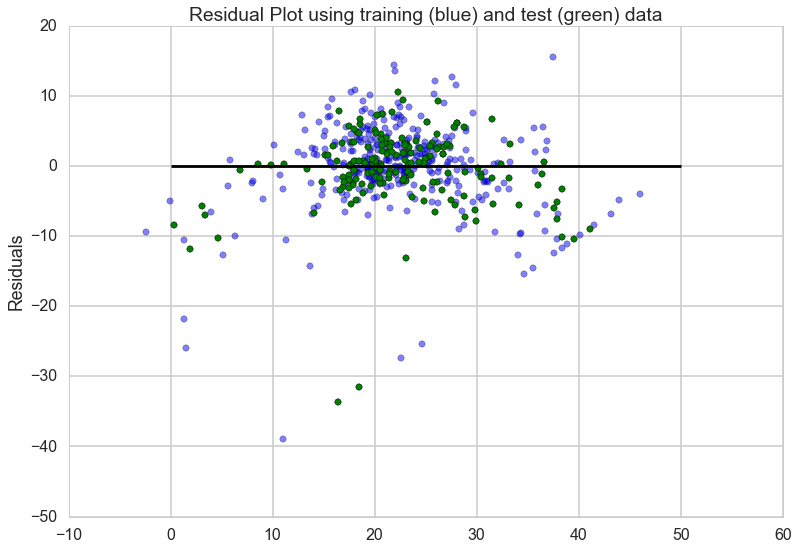

In [270]:
plt.scatter(lm.predict(x_train), lm.predict(x_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(x_test), lm.predict(x_test) - y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

#### K-fold cross-validation

This concept is an extension of the test/train split. The procedure is:
- randomly assign $n$ samples to one of $K$ groups
- for each group $k$:
    - fit the model on all data excluding that in $k$
    - use the model to predict the outcomes of $k$
    - calculate the prediction error for each observation in the $k$'th group (e.g., $(y_{prediction} - y)^2$)
    - calculate the average prediction error across all samples (e.g., $\frac{1}{n}\sum{(y_{prediction, i} - y_i)^2}$)